In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url = 'https://raw.githubusercontent.com/noamshayer/DataAnalistProject/main/Affairs.csv'
affairs_df = pd.read_csv(url)
affairs_df.head()

,Unnamed: 0,affairs,gender,age,yearsmarried,children,religiousness,education,occupation,rating
0,4,0,male,37.0,10.00,no,3,18,7,4
1,5,0,female,27.0,4.00,no,4,14,6,4
2,11,0,female,32.0,15.00,yes,1,12,1,4
3,16,0,male,57.0,15.00,yes,5,18,6,5
4,23,0,male,22.0,0.75,no,2,17,6,3


In [3]:
del affairs_df[affairs_df.columns[0]]
affairs_df.head()

,affairs,gender,age,yearsmarried,children,religiousness,education,occupation,rating
0,0,male,37.0,10.00,no,3,18,7,4
1,0,female,27.0,4.00,no,4,14,6,4
2,0,female,32.0,15.00,yes,1,12,1,4
3,0,male,57.0,15.00,yes,5,18,6,5
4,0,male,22.0,0.75,no,2,17,6,3


In [4]:
new_affairs=affairs_df

In [5]:
new_affairs['age']=new_affairs['age'].astype(str)
new_affairs['yearsmarried']=new_affairs['yearsmarried'].astype(str)
new_affairs['affairs']=new_affairs['affairs'].astype(str)
new_affairs['education']=new_affairs['education'].astype(str)
new_affairs['rating']=new_affairs['rating'].astype(str)
new_affairs['occupation']=new_affairs['occupation'].astype(str)
new_affairs['religiousness']=new_affairs['religiousness'].astype(str)
new_affairs.head()

,affairs,gender,age,yearsmarried,children,religiousness,education,occupation,rating
0,0,male,37.0,10.0,no,3,18,7,4
1,0,female,27.0,4.0,no,4,14,6,4
2,0,female,32.0,15.0,yes,1,12,1,4
3,0,male,57.0,15.0,yes,5,18,6,5
4,0,male,22.0,0.75,no,2,17,6,3


In [6]:
new_affairs['age']=new_affairs['age'].replace({"37.0":"35-39","17.5":"Under 20","22.0":"20-24","27.0":"25-29","32.0":"30-34","42.0":"40-44","47.0":"45-49","52.0":"50-54","57.0":"55+"})
new_affairs['affairs']=new_affairs['affairs'].replace({"0":"none","1":"once","2":"twice","3":"3 times","7":"4-10 times","12":"monthly, weekly or daily"})
new_affairs['yearsmarried']=new_affairs['yearsmarried'].replace({"0.125":"3 months or less","0.417":"4-6 months","0.75":"6 months-1 year","1.5":"1-2 years","4.0":"3-5 years","7.0":"6-8 years","10.0":"9-11 years","15.0":"12+ years"})
new_affairs['religiousness']=new_affairs['religiousness'].replace({"1":"anti","2":"not at all","3":"slightly","4":"somewhat","5":"very"})
new_affairs['education']=new_affairs['education'].replace({"9":"grade school","12":"high school graduate","14":"some college","16":"college graduate","17":" some graduate work","18":"master's degree","20":"advanced degree"})
new_affairs['rating']=new_affairs['rating'].replace({"1":"very unhappy","2":"somewhat unhappy","3":"average","4":"happier than average","5":"very happy"})
new_affairs

,affairs,gender,age,yearsmarried,children,religiousness,education,occupation,rating
0,none,male,35-39,9-11 years,no,slightly,master's degree,7,happier than average
1,none,female,25-29,3-5 years,no,somewhat,some college,6,happier than average
2,none,female,30-34,12+ years,yes,anti,high school graduate,1,happier than average
3,none,male,55+,12+ years,yes,very,master's degree,6,very happy
4,none,male,20-24,6 months-1 year,no,not at all,some graduate work,6,average
...,...,...,...,...,...,...,...,...,...
596,once,male,20-24,1-2 years,yes,anti,high school graduate,2,very happy
597,4-10 times,female,30-34,9-11 years,yes,not at all,master's degree,5,happier than average
598,twice,male,30-34,9-11 years,yes,not at all,some graduate work,6,very happy
599,twice,male,20-24,6-8 years,yes,slightly,master's degree,6,somewhat unhappy


Delete the first column

In [7]:
new_affairs.isnull().sum().sort_values(ascending=False)

affairs          0
gender           0
age              0
yearsmarried     0
children         0
religiousness    0
education        0
occupation       0
rating           0
dtype: int64

We can see that there is not empty spots.

In [8]:
features=["affairs","gender","age","yearsmarried","children","religiousness","education","occupation","rating"]

In [9]:
melt_affairs=new_affairs.melt(id_vars="affairs",value_vars=features)
melt_affairs

,affairs,variable,value
0,none,gender,male
1,none,gender,female
2,none,gender,female
3,none,gender,male
4,none,gender,male
...,...,...,...
4803,once,rating,very happy
4804,4-10 times,rating,happier than average
4805,twice,rating,very happy
4806,twice,rating,somewhat unhappy


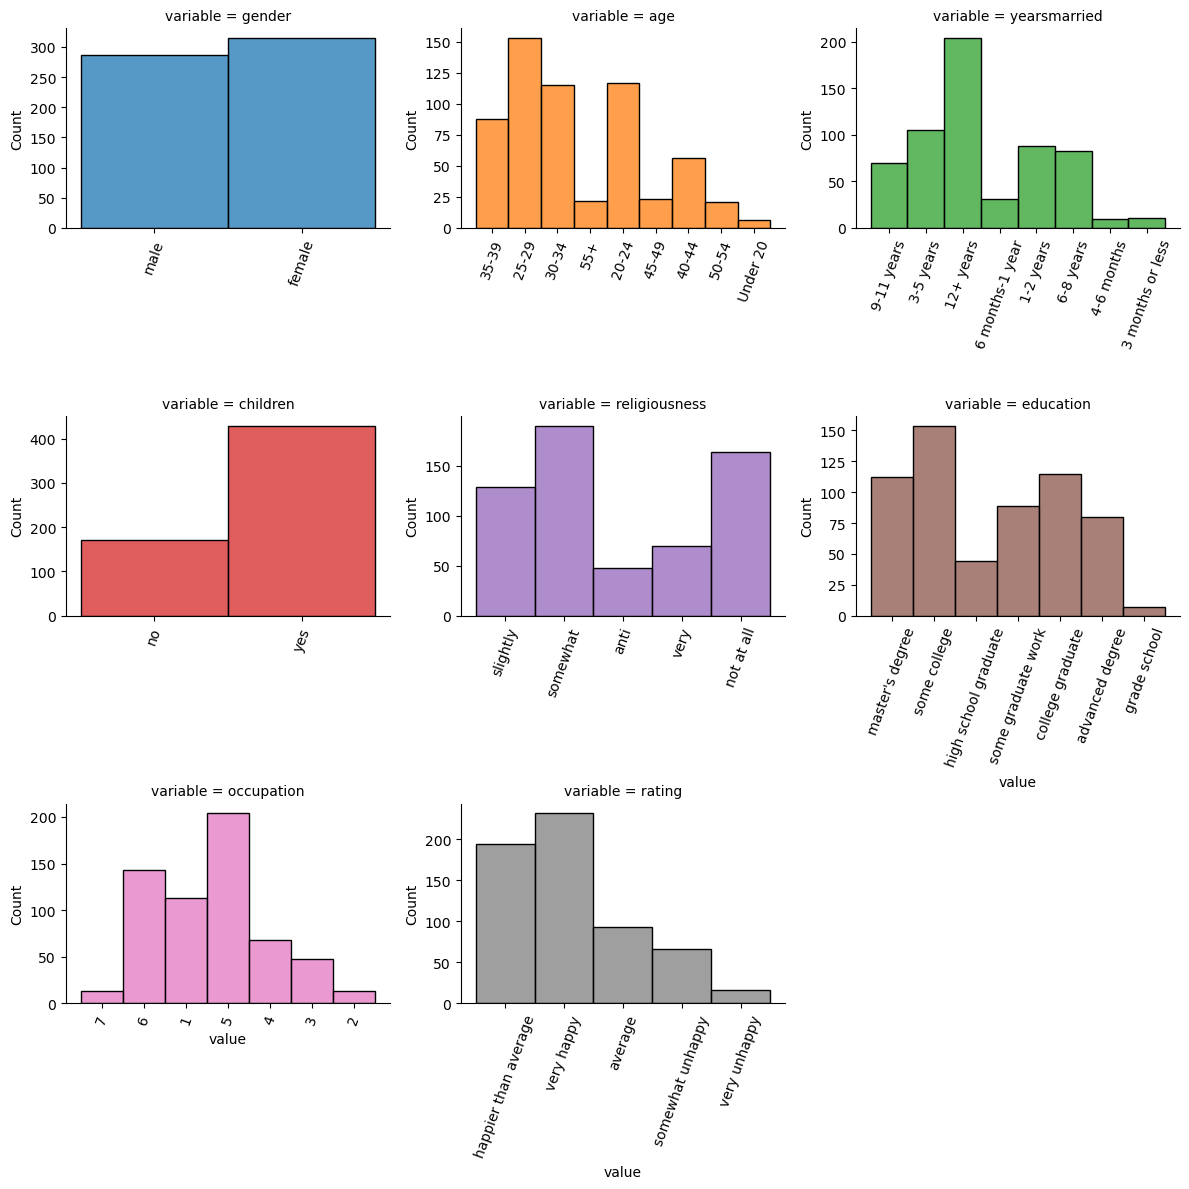

In [10]:
affairs_histplots = sns.FacetGrid(melt_affairs, col="variable", hue="variable", col_wrap=3, sharex=False,sharey=False, height = 4)
affairs_histplots.map_dataframe(sns.histplot, x = 'value')
affairs_histplots.set_xticklabels(rotation=70)
plt.tight_layout()

plt.show()


In [11]:
features=["affairs","gender","age","yearsmarried","children","religiousness","education","occupation","rating"]

In [17]:
affairs_dummies = pd.get_dummies(affairs_df[features])
affairs_dummies

,affairs_3 times,affairs_4-10 times,"affairs_monthly, weekly or daily",affairs_none,affairs_once,affairs_twice,gender_female,gender_male,age_20-24,age_25-29,...,occupation_3,occupation_4,occupation_5,occupation_6,occupation_7,rating_average,rating_happier than average,rating_somewhat unhappy,rating_very happy,rating_very unhappy
0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
1,0,0,0,1,0,0,1,0,0,1,...,0,0,0,1,0,0,1,0,0,0
2,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,1,0,0,0,1,1,0,...,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,0,0,0,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0
597,0,1,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
598,0,0,0,0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
599,0,0,0,0,0,1,0,1,1,0,...,0,0,0,1,0,0,0,1,0,0


In [16]:
correlation_matrix = affairs_dummies.corr().round(2)
correlation_matrix

,affairs_3 times,affairs_4-10 times,"affairs_monthly, weekly or daily",affairs_none,affairs_once,affairs_twice,gender_female,gender_male,age_20-24,age_25-29,...,occupation_3,occupation_4,occupation_5,occupation_6,occupation_7,rating_average,rating_happier than average,rating_somewhat unhappy,rating_very happy,rating_very unhappy
affairs_3 times,1.00,-0.05,-0.05,-0.31,-0.04,-0.03,-0.04,0.04,-0.04,0.03,...,0.05,0.06,-0.05,-0.01,0.04,-0.02,0.04,0.12,-0.10,0.03
affairs_4-10 times,-0.05,1.00,-0.07,-0.48,-0.07,-0.05,-0.00,0.00,-0.07,-0.03,...,0.04,-0.02,-0.03,0.05,0.05,0.05,0.06,0.07,-0.14,-0.00
"affairs_monthly, weekly or daily",-0.05,-0.07,1.00,-0.45,-0.06,-0.04,0.00,-0.00,-0.11,-0.06,...,0.00,-0.01,0.03,0.02,-0.04,-0.04,-0.08,0.24,-0.09,0.13
affairs_none,-0.31,-0.48,-0.45,1.00,-0.42,-0.30,0.05,-0.05,0.13,0.02,...,-0.05,-0.05,0.06,-0.03,-0.05,-0.04,0.00,-0.20,0.19,-0.10
affairs_once,-0.04,-0.07,-0.06,-0.42,1.00,-0.04,-0.04,0.04,0.01,0.04,...,-0.02,0.07,-0.04,-0.05,0.01,0.05,-0.02,-0.02,-0.00,-0.04
affairs_twice,-0.03,-0.05,-0.04,-0.30,-0.04,1.00,-0.04,0.04,-0.03,-0.01,...,0.03,0.00,-0.04,0.07,0.04,0.04,-0.01,-0.03,-0.03,0.10
gender_female,-0.04,-0.00,0.00,0.05,-0.04,-0.04,1.00,-1.00,0.16,0.02,...,0.03,-0.07,0.06,-0.38,-0.11,-0.03,-0.06,0.00,0.06,0.05
gender_male,0.04,0.00,-0.00,-0.05,0.04,0.04,-1.00,1.00,-0.16,-0.02,...,-0.03,0.07,-0.06,0.38,0.11,0.03,0.06,-0.00,-0.06,-0.05
age_20-24,-0.04,-0.07,-0.11,0.13,0.01,-0.03,0.16,-0.16,1.00,-0.29,...,0.08,0.06,0.04,-0.14,-0.07,-0.01,-0.10,-0.12,0.21,-0.08
age_25-29,0.03,-0.03,-0.06,0.02,0.04,-0.01,0.02,-0.02,-0.29,1.00,...,0.01,-0.03,0.02,-0.06,-0.03,-0.05,-0.00,0.04,0.02,-0.03


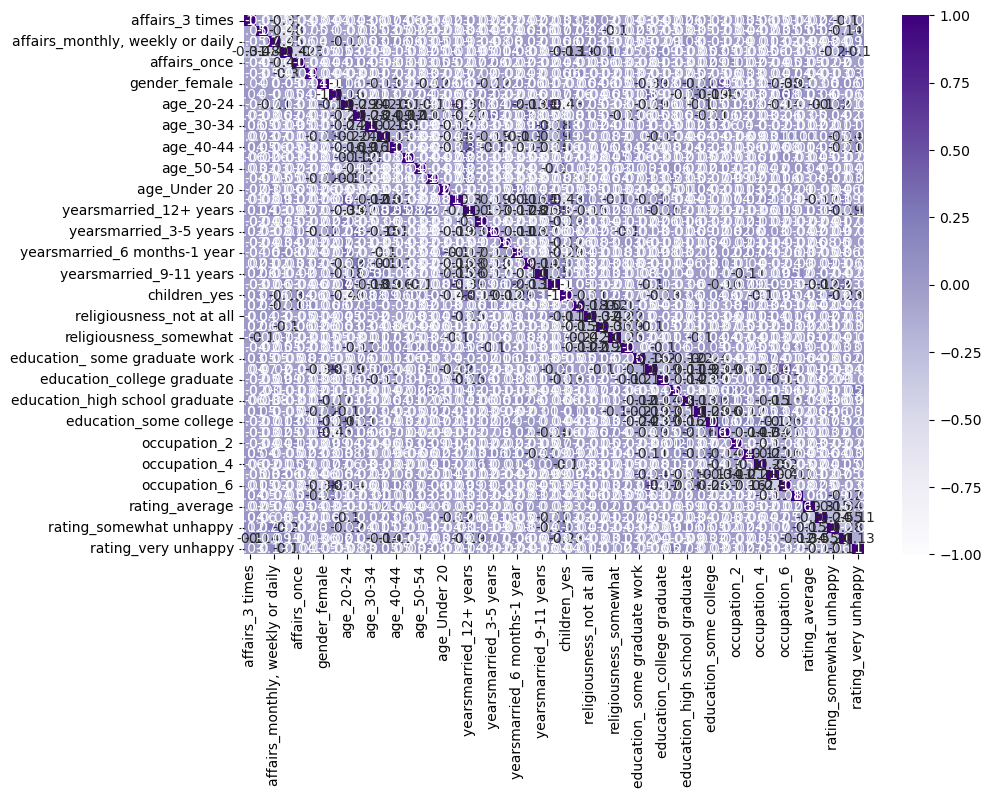

In [14]:
plt.figure(figsize=(10,7))  
sns.heatmap(data=correlation_matrix,cmap='Purples', annot=True)
plt.show()